### **Задание**

На основе рассмотренного на лекции примера реализуйте следующие алгоритмы:

- SARSA
- Q-обучение
- Двойное Q-обучение

для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

1. **SARSA (State-Action-Reward-State-Action)**:

In [19]:
import gym
import numpy as np

env = gym.make('Taxi-v3')
num_states = env.observation_space.n
num_actions = env.action_space.n

# SARSA
def sarsa(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((num_states, num_actions))

    for _ in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)

        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            td_target = reward + gamma * Q[next_state][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            action = next_action

            if done:
                break

    return Q

In [20]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.30363431, -2.29057843, -2.30190043, -2.29805132, -2.28785988,
        -3.68768425],
       [-1.6727167 , -1.63112731, -1.66083379, -1.61664924, -0.84565112,
        -2.81513973],
       ...,
       [-1.14478405, -1.03630455, -1.14478405, -1.15485568, -1.94475379,
        -1.96      ],
       [-2.06452885, -2.06424703, -2.06788133, -2.06042348, -4.38843252,
        -5.69173758],
       [-0.196     , -0.196     , -0.196     ,  3.94618332, -1.        ,
        -1.        ]])

2. **Q-обучение**:


In [21]:
# Q-обучение
def q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((num_states, num_actions))

    for _ in range(num_episodes):
        state = env.reset()

        while True:
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _ = env.step(action)

            td_target = reward + gamma * np.max(Q[next_state])
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state

            if done:
                break

    return Q


In [22]:
Q


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.30363431, -2.29057843, -2.30190043, -2.29805132, -2.28785988,
        -3.68768425],
       [-1.6727167 , -1.63112731, -1.66083379, -1.61664924, -0.84565112,
        -2.81513973],
       ...,
       [-1.14478405, -1.03630455, -1.14478405, -1.15485568, -1.94475379,
        -1.96      ],
       [-2.06452885, -2.06424703, -2.06788133, -2.06042348, -4.38843252,
        -5.69173758],
       [-0.196     , -0.196     , -0.196     ,  3.94618332, -1.        ,
        -1.        ]])

3. **Двойное Q-обучение**:

In [23]:


# Двойное Q-обучение
def double_q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q1 = np.zeros((num_states, num_actions))
    Q2 = np.zeros((num_states, num_actions))

    for _ in range(num_episodes):
        state = env.reset()

        while True:
            action = epsilon_greedy_policy(Q1 + Q2, state, epsilon)
            next_state, reward, done, _ = env.step(action)

            if np.random.rand() < 0.5:
                best_next_action = np.argmax(Q1[next_state])
                td_target = reward + gamma * Q2[next_state][best_next_action]
                td_error = td_target - Q1[state][action]
                Q1[state][action] += alpha * td_error
            else:
                best_next_action = np.argmax(Q2[next_state])
                td_target = reward + gamma * Q1[next_state][best_next_action]
                td_error = td_target - Q2[state][action]
                Q2[state][action] += alpha * td_error

            state = next_state

            if done:
                break

    return Q1 + Q2

def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[state])

# Пример использования
sarsa_Q = sarsa(env)
q_learning_Q = q_learning(env)
double_q_learning_Q = double_q_learning(env)


In [24]:
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.30363431, -2.29057843, -2.30190043, -2.29805132, -2.28785988,
        -3.68768425],
       [-1.6727167 , -1.63112731, -1.66083379, -1.61664924, -0.84565112,
        -2.81513973],
       ...,
       [-1.14478405, -1.03630455, -1.14478405, -1.15485568, -1.94475379,
        -1.96      ],
       [-2.06452885, -2.06424703, -2.06788133, -2.06042348, -4.38843252,
        -5.69173758],
       [-0.196     , -0.196     , -0.196     ,  3.94618332, -1.        ,
        -1.        ]])

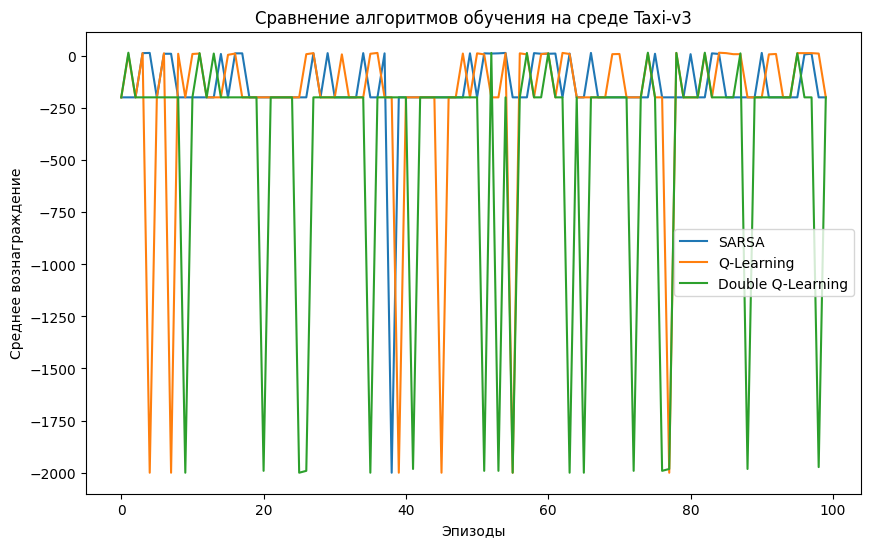

In [25]:
import matplotlib.pyplot as plt

# Получаем среднее за эпизод для каждого алгоритма
def get_average_rewards(Q):
    rewards = []
    for _ in range(100):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = np.argmax(Q[state])
            state, reward, done, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

sarsa_rewards = get_average_rewards(sarsa_Q)
q_learning_rewards = get_average_rewards(q_learning_Q)
double_q_learning_rewards = get_average_rewards(double_q_learning_Q)

# Строим диаграмму
plt.figure(figsize=(10, 6))
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(q_learning_rewards, label='Q-Learning')
plt.plot(double_q_learning_rewards, label='Double Q-Learning')
plt.xlabel('Эпизоды')
plt.ylabel('Среднее вознаграждение')
plt.title('Сравнение алгоритмов обучения на среде Taxi-v3')
plt.legend()
plt.show()
